WB data analysis and PCA with census data.

In [30]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import math
%matplotlib inline

In [34]:
#Load WB census data, this has some aggregate points with village id = 0
data = pd.read_csv('/home/armaan/BTP/census/WestBengal/WB-combined-dataset.csv', sep=",",header=None,index_col=False,dtype={0: str,2: str,4: str,6: str,7: str})

In [35]:
data.describe()

,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
count,37973.000000,37973.000000,37973.000000,37973.000000,37973.000000,37973.000000,37973.000000,37973.000000,37973.000000,37973.000000,37973.000000,37973.000000,37973.000000,37973.000000,37973.000000,37973.000000,37973.000000
mean,31.886627,51.996010,1.011161,2.085350,56.072328,28.356796,5.987791,3.664804,0.605135,0.904019,6.552429,41.167577,37.780299,18.604782,6.120451,1.138717,28.245324
std,24.584443,23.858956,3.726864,7.435363,21.923261,15.052955,6.519636,5.820493,1.828204,2.285621,17.939338,27.526587,31.757275,16.033182,6.923252,3.815406,23.125068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.200000,36.300000,0.000000,0.000000,42.100000,18.300000,1.900000,0.100000,0.000000,0.000000,0.000000,19.200000,8.700000,6.500000,2.000000,0.000000,9.100000
50%,27.700000,51.700000,0.100000,0.300000,57.200000,28.800000,4.700000,1.800000,0.000000,0.300000,0.000000,39.100000,30.500000,15.000000,4.500000,0.500000,22.800000
75%,45.900000,68.200000,0.800000,1.200000,71.400000,37.900000,8.100000,4.500000,0.700000,1.100000,2.000000,61.400000,63.600000,26.800000,8.200000,1.300000,43.300000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,129.000000,136.000000,137.000000,140.000000


In [37]:
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,19,WEST BENGAL,327,Darjiling,00000,Darjiling,000000,0000,District - Darjiling,45.9,...,12,3.7,3.1,21,77.7,65.7,58.3,10.4,4,50.2


In [38]:
ls_headings=['state-code', 'state-name', 'district-code', 'district-name', 'teh-code', 'teh-name', 'vill-code', 'ward-no', 'area-name', 'res_good', 'res_bad', 'res-other_good', 'res-other_bad', '1-room', '2-room', '3-room', '4-room', '5-room', '6-room', 'water_treated', 'lighting_electric', 'lat-facility', 'tv', 'bicycle', 'car', 'permanent-house']
feature_columns = ls_headings[9:]
positive_feature_columns=['res_good', 'res-other_good', '4-room', '5-room', '6-room', 'water_treated', 'lighting_electric', 'lat-facility', 'tv', 'bicycle', 'car', 'permanent-house']

In [39]:
data.columns=ls_headings
data['census_id'] = data['state-code']+data['district-code']+data['teh-code']+data['vill-code']

Load data for Punjab and Haryana villages (23997 villages) into python, assign headers.
1-9 : meta data columns
10-26 : feature columns

In [40]:
data.head(2)

,state-code,state-name,district-code,district-name,teh-code,teh-name,vill-code,ward-no,area-name,res_good,...,5-room,6-room,water_treated,lighting_electric,lat-facility,tv,bicycle,car,permanent-house,census_id
0,19,WEST BENGAL,327,Darjiling,00000,Darjiling,000000,0000,District - Darjiling,45.9,...,3.7,3.1,21.0,77.7,65.7,58.3,10.4,4.0,50.2,1932700000000000
1,19,WEST BENGAL,327,Darjiling,00000,Darjiling,000000,0000,District - Darjiling,36.6,...,3.2,2.4,7.5,69.5,52.3,46.5,5.6,2.2,35.7,1932700000000000


In [43]:
data.irow(0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: irow(i) is deprecated. Please use .iloc[i]
  if __name__ == '__main__':


state-code                              19
state-name                     WEST BENGAL
district-code                          327
district-name                   Darjiling 
teh-code                             00000
teh-name                        Darjiling 
vill-code                           000000
ward-no                               0000
area-name            District - Darjiling 
res_good                              45.9
res_bad                               44.3
res-other_good                         1.7
res-other_bad                          1.2
1-room                                28.4
2-room                                32.1
3-room                                19.6
4-room                                  12
5-room                                 3.7
6-room                                 3.1
water_treated                           21
lighting_electric                     77.7
lat-facility                          65.7
tv                                    58.3
bicycle    

In [44]:
data = data[data['vill-code'].astype(int)!=0] #Remove aggregate information

In [45]:
data.irow(0)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: irow(i) is deprecated. Please use .iloc[i]
  if __name__ == '__main__':


state-code                            19
state-name                   WEST BENGAL
district-code                        327
district-name                 Darjiling 
teh-code                           02154
teh-name             Darjeeling Pulbazar
vill-code                         306145
ward-no                             0000
area-name               Singalila Forest
res_good                            16.4
res_bad                             77.3
res-other_good                         0
res-other_bad                        0.6
1-room                              12.4
2-room                              67.6
3-room                                17
4-room                               0.9
5-room                                 0
6-room                                 0
water_treated                        9.7
lighting_electric                   14.5
lat-facility                        53.3
tv                                   4.2
bicycle                                0
car             

In [10]:
data.shape

(37235, 27)

In [11]:
sampleData=data[:3]

In [13]:
sampleData

,state-code,state-name,district-code,district-name,teh-code,teh-name,vill-code,ward-no,area-name,res_good,...,5-room,6-room,water_treated,lighting_electric,lat-facility,tv,bicycle,car,permanent-house,census_id
4,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306145,0000,Singalila Forest,16.4,...,0.0,0.0,9.7,14.5,53.3,4.2,0.0,0.0,27.0,1932702154306145
5,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306146,0000,Rimbick,33.0,...,4.6,2.7,1.6,61.6,69.4,37.0,0.4,1.4,18.6,1932702154306146
6,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306147,0000,Namla,38.1,...,3.8,1.5,0.0,88.4,66.6,50.9,0.7,0.7,25.5,1932702154306147


In [14]:
feature_columns = ls_headings[9:]
print feature_columns
positive_feature_columns=['res_good', 'res-other_good', '4-room', '5-room', '6-room', 'water_treated', 'lighting_electric', 'lat-facility', 'tv', 'bicycle', 'car', 'permanent-house']
print positive_feature_columns

['res_good', 'res_bad', 'res-other_good', 'res-other_bad', '1-room', '2-room', '3-room', '4-room', '5-room', '6-room', 'water_treated', 'lighting_electric', 'lat-facility', 'tv', 'bicycle', 'car', 'permanent-house']
['res_good', 'res-other_good', '4-room', '5-room', '6-room', 'water_treated', 'lighting_electric', 'lat-facility', 'tv', 'bicycle', 'car', 'permanent-house']


In [15]:
sampleData[positive_feature_columns]

,res_good,res-other_good,4-room,5-room,6-room,water_treated,lighting_electric,lat-facility,tv,bicycle,car,permanent-house
4,16.4,0.0,0.9,0.0,0.0,9.7,14.5,53.3,4.2,0.0,0.0,27.0
5,33.0,3.8,13.1,4.6,2.7,1.6,61.6,69.4,37.0,0.4,1.4,18.6
6,38.1,1.1,16.9,3.8,1.5,0.0,88.4,66.6,50.9,0.7,0.7,25.5


In [22]:
import math
sampleData[positive_feature_columns]=sampleData[positive_feature_columns].apply(lambda x: (x-x.mean())/math.sqrt(np.var(x)))

In [23]:
sampleData[positive_feature_columns]

,res_good,res-other_good,4-room,5-room,6-room,water_treated,lighting_electric,lat-facility,tv,bicycle,car,permanent-house
4,-1.378037,-1.023056,-1.37720,-1.395357,-1.267500,1.397379,-1.320386,-1.395357,-1.353510,-1.278724,-1.224745e+00,0.902165
5,0.413771,1.357115,0.41023,0.897015,1.176965,-0.510279,0.221519,0.897015,0.321778,0.116248,1.224745e+00,-1.394255
6,0.964266,-0.334059,0.96697,0.498342,0.090536,-0.887100,1.098867,0.498342,1.031732,1.162476,1.110043e-16,0.492090


In [24]:
data[feature_columns] = data[feature_columns].apply(lambda x: (x - x.mean()) / math.sqrt((np.var(x))))

In [25]:
import numpy as np
x=np.array([[1,2,1],[1.1,1,1],[1,3,1.1]])
x.apply(lambda x: (x-x.mean())/(np.var(x)))
print x

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

Normalize feature columns to mean 0 variance 1.

In [26]:
data.head(3)

,state-code,state-name,district-code,district-name,teh-code,teh-name,vill-code,ward-no,area-name,res_good,...,5-room,6-room,water_treated,lighting_electric,lat-facility,tv,bicycle,car,permanent-house,census_id
4,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306145,0000,Singalila Forest,-0.054031,...,-0.588596,-0.408171,-0.015668,-0.055428,-0.038476,-0.077265,-0.152444,-0.159045,-0.050728,1932702154306145
5,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306146,0000,Rimbick,-0.051116,...,0.087115,0.051847,-0.021547,-0.053413,-0.036213,-0.070742,-0.123653,0.006165,-0.055021,1932702154306146
6,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306147,0000,Namla,-0.050220,...,-0.030400,-0.152605,-0.022708,-0.052266,-0.036607,-0.067977,-0.102060,-0.076440,-0.051494,1932702154306147


In [27]:
from sklearn import decomposition
pca2 = sklearn.decomposition.PCA(n_components=2, copy=True)
pca_full = sklearn.decomposition.PCA()
pca2_positive = sklearn.decomposition.PCA(n_components=2, copy=True)

In [28]:
pca2.fit(data[feature_columns])
pca2_positive.fit(data[positive_feature_columns])
pca_full.fit(data[positive_feature_columns])

PCA(copy=True, n_components=None, whiten=False)

In [29]:
print pca2.explained_variance_ratio_
print pca2_positive.explained_variance_ratio_
print pca_full.explained_variance_ratio_

[ 0.58009758  0.13831958]
[ 0.61668955  0.14821277]
[ 0.61668955  0.14821277  0.10157414  0.06558384  0.03131937  0.02163427
  0.0053496   0.00398901  0.0020503   0.00174822  0.00103831  0.00081061]


Do PCA, keep top 2 principal components.

In [45]:
X_positive = pca2_positive.fit_transform(data[positive_feature_columns])

In [46]:
X = pca2.fit_transform(data[feature_columns])

In [21]:
Y=X_positive
f = plt.figure()
plt.scatter(Y[:,0],Y[:,1])
plt.plot(np.zeros(len(Y)),Y[:,1])
plt.plot(Y[:,0],np.zeros(len(Y)))
plt.xlim([-200,200])
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('2-D visualization of data')

NameError: name 'X_positive' is not defined

In [55]:
len(X_positive)
len(data)
data['X1']=X_positive[:,0]
data['X2']=X_positive[:,1]

In [58]:
data

,state-code,state-name,district-code,district-name,teh-code,teh-name,vill-code,ward-no,area-name,res_good,...,lighting_electric,lat-facility,tv,bicycle,car,permanent-house,census_id,newX,X1,X2
4,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306145,0000,Singalila Forest,-15.439444,...,-26.5919,15.712343,-14.29081,-6.107522,-1.133401,-1.037484,1932702154306145,-12.026055,-12.026055,34.015382
5,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306146,0000,Rimbick,1.160556,...,20.5081,31.812343,18.50919,-5.707522,0.266599,-9.437484,1932702154306146,32.794807,32.794807,7.041035
6,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306147,0000,Namla,6.260556,...,47.3081,29.012343,32.40919,-5.407522,-0.433401,-2.537484,1932702154306147,52.542293,52.542293,-12.130106
7,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306148,0000,Lodhama,-31.139444,...,56.9081,-15.787657,-12.39081,-6.107522,-1.133401,-18.537484,1932702154306148,-1.343902,-1.343902,-15.780446
8,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306149,0000,Hatta,-3.339444,...,-8.2919,4.112343,3.50919,-5.007522,-0.833401,-5.737484,1932702154306149,-4.278414,-4.278414,7.846165
9,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306150,0000,Dangia,-21.239444,...,-17.9919,29.712343,-9.69081,-5.807522,-0.333401,-21.737484,1932702154306150,-7.263655,-7.263655,41.090386
10,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306151,0000,Singbhumdera,23.560556,...,-40.8919,3.212343,-10.59081,-6.107522,-0.733401,-20.637484,1932702154306151,-24.413896,-24.413896,8.498283
11,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306152,0000,Majua,15.660556,...,-40.6919,29.312343,-11.09081,-6.107522,-1.133401,-12.337484,1932702154306152,-5.890732,-5.890732,29.876810
12,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306153,0000,Kankibong,4.560556,...,35.0081,19.512343,3.50919,-4.807522,0.066599,-20.437484,1932702154306153,24.406992,24.406992,-7.306212
13,19,WEST BENGAL,327,Darjiling,02154,Darjeeling Pulbazar,306154,0000,Jhepi,-11.339444,...,40.4081,7.512343,8.70919,-5.507522,-0.233401,-19.037484,1932702154306154,17.125519,17.125519,-9.052262


In [59]:
dataN=data

In [67]:
toSaveData=dataN.drop(feature_columns,axis=1)

In [68]:
toSaveData.to_csv("PCAAssetOwnershipPositive.csv")

No clusters can be observed, a continuum of feature values for villages is observed. 
Next we'll do a 3D plot to see if this extends in 3 dimensions.

In [16]:
pca_full = sklearn.decomposition.PCA()
pca_full.fit(data[feature_columns])
print pca_full.explained_variance_ratio_
X_full = pca_full.fit_transform(data[feature_columns])

[ 0.3596259   0.12682423  0.11600016  0.1061766   0.06481167  0.0592992
  0.04809804  0.0452674   0.02710791  0.01420802  0.01148861  0.00790677
  0.00487153  0.00385105  0.00304265  0.00089605  0.0005242 ]


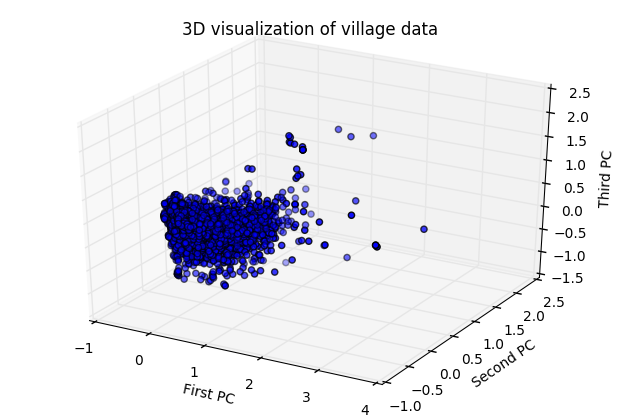

In [17]:
from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
import pylab
fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(X_full[:,0],X_full[:,1],X_full[:,2])
ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')
ax.set_zlabel('Third PC')
ax.set_title('3D visualization of village data')


As we can see, no clusters can be observed here too.
So now our aim is to use a samping strategy with the following properties :
-select villages with maximum variance, i.e. we want villages farther from the mean to have a higher probability of getting picked by our sampling algorithm.
-for this we will assign weights to each village proportional to it's distance from the centre point (for the first two principal components)

In [18]:
import math
distance_vec = np.sqrt(np.mean(X*X, 1))

In [19]:
sampledData = data.sample(n=10100, weights = distance_vec)
sampledData.shape
uniformlySampledData = data.sample(n=10100)

sampledData uses the above sampling strategy while uniformlySampledData uses uniform sampling (we will compare the results below)

In [20]:
sampledData.head(3)

,state-code,state-name,district-code,district-name,teh-code,teh-name,vill-code,ward-no,area-name,res_good,...,5-room,6-room,water_treated,lighting_electric,lat-facility,tv,bicycle,car,permanent-house,census_id
8438,03,PUNJAB,047,Mansa,00249,Mansa,036085,0000,Khiala Khurd (53),0.094864,...,0.063014,0.125653,0.054714,0.051316,-0.011781,0.023811,-0.047376,-0.050320,-0.036104,0304700249036085
12074,03,PUNJAB,053,Sangrur,00272,Sunam,039830,0000,Ladbanjara Kalan (147),-0.057215,...,-0.068461,-0.068597,-0.027717,0.022223,0.011079,0.004900,-0.022989,-0.037544,0.034971,0305300272039830
15472,06,HARYANA,077,Jind,00383,Jind,060156,0000,Shamlo Khurd (63),-0.064763,...,-0.225220,-0.135469,0.061598,0.032667,-0.030168,0.000729,-0.071067,-0.128570,-0.157725,0607700383060156


In [28]:
X_new = pca_full.fit_transform(sampledData[feature_columns])
X_uniformly = pca_full.transform(uniformlySampledData[feature_columns])

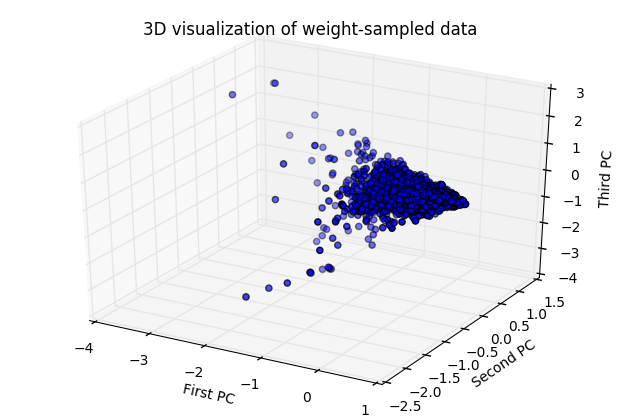

In [29]:
from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
import pylab
fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(X_new[:,0],X_new[:,1],X_new[:,2])
ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')
ax.set_zlabel('Third PC')
ax.set_title('3D visualization of weight-sampled data')

Now let's compare the villages sampled by the 2 different sampling strategies.

(-1, 2.5)

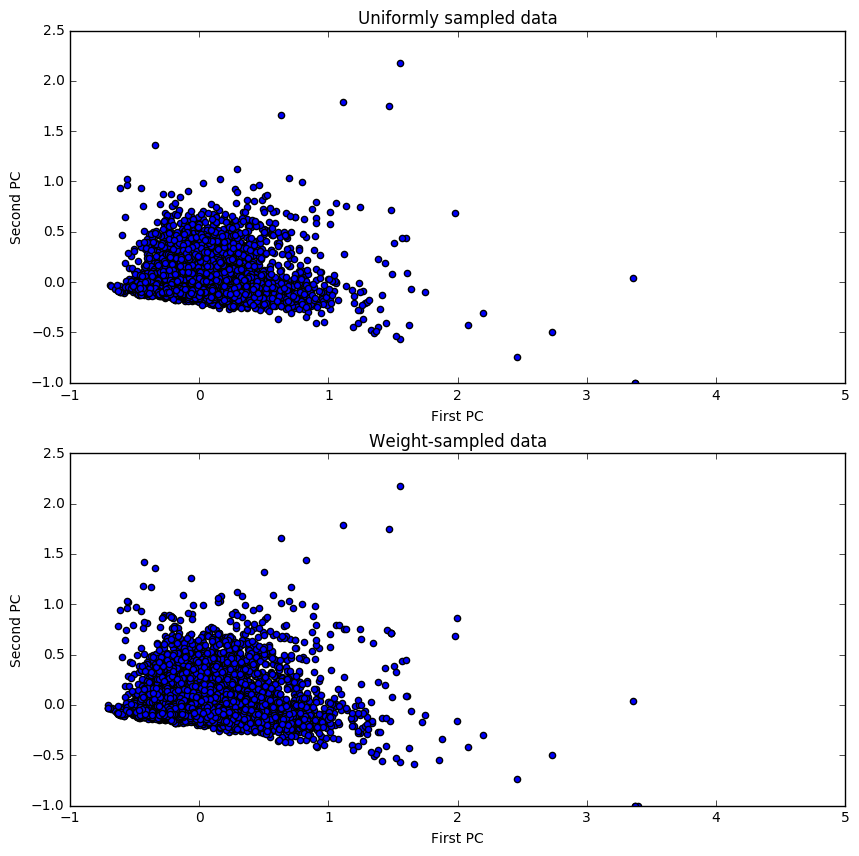

In [31]:
fig = plt.figure(figsize=(10,10))
ax1=fig.add_subplot(211)
ax1.scatter(-X_uniformly[:,0], -X_uniformly[:,1])
ax1.set_xlabel('First PC')
ax1.set_ylabel('Second PC')
ax1.set_title('Uniformly sampled data')
ax1.set_xlim([-1,5])
ax1.set_ylim([-1,2.5])
ax2=fig.add_subplot(212)
ax2.scatter(-X_new[:,0], -X_new[:,1])
ax2.set_xlabel('First PC')
ax2.set_ylabel('Second PC')
ax2.set_title('Weight-sampled data')
ax2.set_xlim([-1,5])
ax2.set_ylim([-1,2.5])

In [24]:
sampledVillagesMetaData = sampledData.drop(feature_columns,axis=1)

In [25]:
sampledVillagesMetaData.head(3)

,state-code,state-name,district-code,district-name,teh-code,teh-name,vill-code,ward-no,area-name,census_id
8438,03,PUNJAB,047,Mansa,00249,Mansa,036085,0000,Khiala Khurd (53),0304700249036085
12074,03,PUNJAB,053,Sangrur,00272,Sunam,039830,0000,Ladbanjara Kalan (147),0305300272039830
15472,06,HARYANA,077,Jind,00383,Jind,060156,0000,Shamlo Khurd (63),0607700383060156


In [26]:
sampledVillagesMetaData.to_csv('/home/armaan/Desktop/selectedVillages.csv')